In [26]:
import torch
import torch.nn as nn
import pandas as pd

In [27]:
import sys, os

In [28]:
# %load_ext autoreload
# %autoreload 2
# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd() 

module_path = os.path.join(current_dir, "module")
sys.path.append(module_path)

from data_mod import SentimentDataModule
from model_mod import LstmClassifier, TrainModel


utility_path = os.path.join(current_dir, "../Utility")
sys.path.append(utility_path)

from utility_mod import Util

In [29]:
yaml_path = os.path.join(current_dir, "params.yaml")
util_yaml_path = os.path.join(current_dir, "../Utility/params.yaml")

util_params = Util.get_params(util_yaml_path)
data_params = Util.get_params(yaml_path)["data"]
data_params.update(util_params)
model_params = Util.get_params(yaml_path)["model"]
model_params.update(util_params)

sdm = SentimentDataModule(data_params)

In [30]:
is_platform_pc = sdm.params["platform"] == "cuda"
is_encoded_data_present = os.path.isdir(sdm.params["encoded_data_path"])

if not is_platform_pc or not is_encoded_data_present:
    sdm.fetch_dataset()

sdm.set_tokenizer()
sdm.load_encoded_dataset()

fetch_dataset()
len(self.dataset['train'])=3600000, len(self.dataset['test'])=400000
("self.dataset['train'][0]={'label': 1, 'content': 'This sound track was "
 'beautiful! It paints the senery in your mind so well I would recomend it '
 'even to people who hate vid. game music! I have played the game Chrono Cross '
 'but out of all of the games I have ever played it has the best music! It '
 'backs away from crude keyboarding and takes a fresher step with grate '
 'guitars and soulful orchestras. It would impress anyone who cares to listen! '
 "^_^'}")
set_tokenizer()
load_encoded_dataset()


In [31]:
train_dataloader, val_dataloader = sdm.get_data_loader()
model = LstmClassifier(vocab_size = sdm.tokenizer.vocab_size, dim_list = model_params["dim_list"], dropout=model_params["dropout"])
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=model_params["optimizer_lr"])

train_model = TrainModel(model_params, train_dataloader, val_dataloader, model, loss_func, optimizer)
output = train_model.train_model()

get_data_loader()
train_model()
model_epoch(mode='train')


KeyboardInterrupt: 

In [ ]:

# Util.write_yaml(output_path+"/config.yaml", model_params) 
print(model_params)


{'dim_list': [128, 64, 1], 'dropout': 0.2, 'epoch': 2, 'index': 0, 'optimizer_lr': 0.0001, 'platform': 'pc', 'cpu_threads': 8, 'arch_bit': 64, 'device': device(type='cpu')}


plot_metrics()


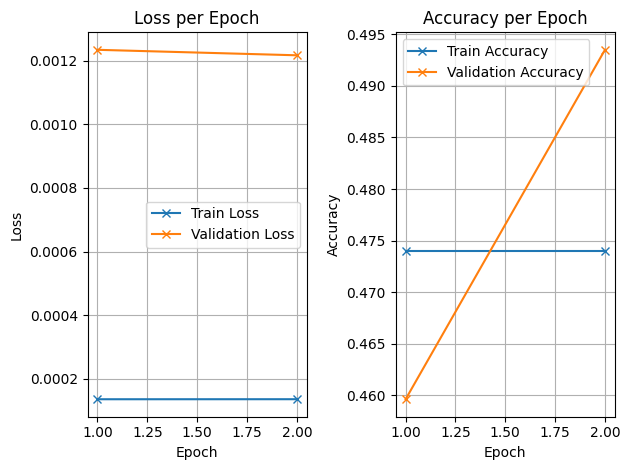

In [ ]:
metrics_df = pd.DataFrame(output)
plt = train_model.plot_metrics(metrics_df)
Util.increment_model_index(yaml_path)
metrics_df = pd.DataFrame(output)
model_params["index"]+=1
output_path = f"output/model_{model_params['index']}"

os.mkdir(output_path)
torch.save(model.state_dict(), f"{output_path}/model.pt")
plt.savefig(f"{output_path}/loss_accuracy_plot.png")
del model_params['device']
Util.write_yaml(output_path+"/config.yaml", model_params) 


In [ ]:
# To do
# Generalization
# Config the model
# Parametrization
# Split files for data clean mod
# Visualize the model
# Unit test?
# Implement Early Stop
# Data EDA
# Remove comments